Author: Hari Adhikari


In this final assignment, i would like to investigate the geographical position (location) of Nepalese Resturant in Helsinki region. Besides that i would also like to see how accessible they are from the nearest train and metro stations. Furthermore, i would like to see, the possible new areas for opening Nepali resturants in Helsinki regions, based on population density. 

So far, i have manually identified the location of each Nepali resturant from Google search, as they were not available in 1) Trip advisor and 2) Open Street Map. This data can be read from data folder "listofnepaliResturants.txt"


Install and import necessary modules 

- Install Geopandas  
conda install -c conda-forge geopandas  
- Install Shapely  
conda install -c conda-forge shapely  
- Install geoplot  
conda install -c conda-forge geoplot  
- Install osmnx  
conda install -c conda-forge osmnx  
- Install pysal  
conda install -c conda-forge pysal  
- Install contextily  
conda install -c conda-forge contextily  
- Install rasterio  
conda install -c conda-forge rasterio  
- Install rasterstats  
conda install -c conda-forge rasterstats  

In [1]:
# Import some modules
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Point, LineString, Polygon
import osmnx
import pysal
import cartopy
import geoplot
import osmnx
import folium
import rasterio
import contextily
import matplotlib.pyplot as plt
%matplotlib inline

/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
#origins = pd.read_csv("data/listofnepaliResturants.txt")
data = r"Data/listofnepaliResturants.txt"

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
data = pd.read_csv(data, sep=';')

In [3]:
# Check your input data
print(data.head())

   id                     name                                  addr
0   1      Ravintola Base Camp      Yliopistonkatu 5, 00100 Helsinki
1   2       Ravintola Mountain  Nordenskiöldinkatu 8, 00250 Helsinki
2   3  Ravintola Satkar Kamppi      Fredrikinkatu 46, 00100 Helsinki
3   4       Ravintola Kantipur      Lönnrotinkatu 25, 00180 Helsinki
4   5     Mount Everest Kamppi    Lapinlahdenkatu 15, 00180 Helsinki


In [4]:
# Import the geocoding tool
from geopandas.tools import geocode

# Geocode the adrresses
geo = None

# Geocode addresses with Nominatim backend
geo = geocode(data['addr'], provider = 'nominatim', user_agent = 'autogis_student_2')
geo.head(7)

,address,geometry
0,"Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...",POINT (24.9466636 60.1699095)
1,"Mountain (Nepalese kitchen), 8, Nordenskiöldin...",POINT (24.9169656 60.1863164)
2,"Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...",POINT (24.9327188 60.1673745)
3,"Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...",POINT (24.933405 60.1647085)
4,"15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...",POINT (24.9280348 60.1669584)
5,"Pikku Nepal Cross Kitchen, 3, Sörnäistenlaitur...",POINT (24.9837796 60.1851661)
6,"Himalaya, 1a, Ratakatu, Kaartinkaupunki, Etelä...",POINT (24.9456106 60.1637353)


In [7]:
type(geodata)

geopandas.geodataframe.GeoDataFrame

In [5]:
# Join the tables
geodata = None

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
geodata = geo.join(data)
geodata.head()

,address,geometry,id,name,addr
0,"Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...",POINT (24.9466636 60.1699095),1,Ravintola Base Camp,"Yliopistonkatu 5, 00100 Helsinki"
1,"Mountain (Nepalese kitchen), 8, Nordenskiöldin...",POINT (24.9169656 60.1863164),2,Ravintola Mountain,"Nordenskiöldinkatu 8, 00250 Helsinki"
2,"Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...",POINT (24.9327188 60.1673745),3,Ravintola Satkar Kamppi,"Fredrikinkatu 46, 00100 Helsinki"
3,"Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...",POINT (24.933405 60.1647085),4,Ravintola Kantipur,"Lönnrotinkatu 25, 00180 Helsinki"
4,"15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...",POINT (24.9280348 60.1669584),5,Mount Everest Kamppi,"Lapinlahdenkatu 15, 00180 Helsinki"


In [6]:
geodata['Latitude'] = geodata['geometry'].y
geodata['Longitude'] = geodata['geometry'].x
geodata.head(5)
#geodata.to_file(driver = 'ESRI Shapefile', filename= "Data/NepaliResturantLocation.shp")

,address,geometry,id,name,addr,Latitude,Longitude
0,"Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...",POINT (24.9466636 60.1699095),1,Ravintola Base Camp,"Yliopistonkatu 5, 00100 Helsinki",60.169910,24.946664
1,"Mountain (Nepalese kitchen), 8, Nordenskiöldin...",POINT (24.9169656 60.1863164),2,Ravintola Mountain,"Nordenskiöldinkatu 8, 00250 Helsinki",60.186316,24.916966
2,"Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...",POINT (24.9327188 60.1673745),3,Ravintola Satkar Kamppi,"Fredrikinkatu 46, 00100 Helsinki",60.167375,24.932719
3,"Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...",POINT (24.933405 60.1647085),4,Ravintola Kantipur,"Lönnrotinkatu 25, 00180 Helsinki",60.164709,24.933405
4,"15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...",POINT (24.9280348 60.1669584),5,Mount Everest Kamppi,"Lapinlahdenkatu 15, 00180 Helsinki",60.166958,24.928035


In [2]:
geodata = "Data/NepaliResturantLocation.shp"
geodata = gpd.read_file(geodata)
geodata.head()

,address,id,name,addr,Latitude,Longitude,geometry
0,"Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...",1,Ravintola Base Camp,"Yliopistonkatu 5, 00100 Helsinki",60.169910,24.946664,POINT (24.9466636 60.1699095)
1,"Mountain (Nepalese kitchen), 8, Nordenskiöldin...",2,Ravintola Mountain,"Nordenskiöldinkatu 8, 00250 Helsinki",60.186316,24.916966,POINT (24.9169656 60.1863164)
2,"Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...",3,Ravintola Satkar Kamppi,"Fredrikinkatu 46, 00100 Helsinki",60.167375,24.932719,POINT (24.9327188 60.1673745)
3,"Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...",4,Ravintola Kantipur,"Lönnrotinkatu 25, 00180 Helsinki",60.164709,24.933405,POINT (24.933405 60.1647085)
4,"15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...",5,Mount Everest Kamppi,"Lapinlahdenkatu 15, 00180 Helsinki",60.166958,24.928035,POINT (24.9280348 60.1669584)


In [3]:
locations = geodata[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[60.163146, 24.927851]

In [21]:
# Project geodata to Gauskruger 4, Finland
print(geodata.crs)
geodata = geodata.to_crs(epsg=3879)
print(geodata.crs)

# save the GeoDataFrame
#geodata.to_file(driver = 'ESRI Shapefile', filename= "Data/NepaliResturantLocation.shp")

{'no_defs': True, 'init': 'epsg:3879'}
{'no_defs': True, 'init': 'epsg:3879'}


In [4]:
import folium.plugins

#from folium.plugins import MarkerCluster

map2 = folium.Map(location=[geodata['Latitude'].mean(),geodata['Longitude'].mean()], tiles='Stamen Terrain', zoom_start=11)
marker_cluster = folium.plugins.MarkerCluster().add_to(map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=geodata['name'][point], icon=folium.Icon(color='darkblue', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(marker_cluster)
map2


In [24]:
outfp = "Data/NepaleseResturantInHelsinkiRegionsCluster.html"
map2.save(outfp)

In [5]:
import geopandas as gpd

MetroStation = "Data/MetroStationsInHelsinki.geojson"
TrainStation = "Data/Trainstation.geojson"

MetroStation = gpd.read_file(MetroStation)
TrainStation = gpd.read_file(TrainStation)

print(type(MetroStation))
print(type(TrainStation))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [6]:
TrainStation.head(2)

,id,@id,@relations,addr:city,addr:housenumber,addr:postcode,addr:street,alt_name,alt_name:en,alt_name:sv,...,contact:website,layer,level,internet_access:fee,old_name:fi,old_name:sv,subway,uic_ref,name:lt,geometry
0,way/52203591,way/52203591,"[ { ""role"": ""platform"", ""rel"": 4000897, ""relta...",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (25.0775456 60.2099213, 25.0775403 ..."
1,way/45860664,way/45860664,"[ { ""role"": ""platform"", ""rel"": 4000923, ""relta...",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (25.1416189 60.207132, 25.1416139 6..."


In [10]:
MetroStation.crs

{'init': 'epsg:4326'}

In [22]:
# mark each station as a point
m = folium.Map(location=[60.20, 24.9], zoom_start=12)

for index, row in geodata.iterrows():
    folium.Circle([row['Latitude'], row['Longitude']],
                        radius=1000,
                        popup=row['name'],
                        fill_color="red", # divvy color "#3db7e4"
                       ).add_to(m)
    
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=geodata['name'][point], icon=folium.Icon(color='red', icon_color='white', icon='home', angle=0, prefix='fa')).add_to(m)
    
folium.GeoJson(TrainStation).add_to(m)
#folium.GeoJson(roads).add_to(m)
folium.LatLngPopup().add_to(m)

m.add_child(folium.LatLngPopup())

m
#folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map)

In [ ]:
outfp = "Data/NepaleseResturantInHelsinkiRegions.html"
map.save(outfp)

Also need to take care of the projection systeme.   
Check projection of each shape file population data, geojson files, train stations, etc  

I want to calculate the density of poeple within the 1km radius  
then also want to see how far the resturant are from the nearest metro or train stations.  
Also plot cloropleth map based on population sum in the study area.  


In [47]:
# Lets convert the point data frame into polygon data frame (polygon)
geodata1 = geodata
geodata1['geometry'] = geodata1.geometry.buffer(2000)
print(geodata1.head(2))

                                             address  \
0  Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...   
1  Mountain (Nepalese kitchen), 8, Nordenskiöldin...   

                                            geometry  id                 name  \
0  POLYGON ((25503034.28505746 6673200.536712677,...   1  Ravintola Base Camp   
1  POLYGON ((25501387.9403187 6675030.217609301, ...   2   Ravintola Mountain   

                                   addr   Latitude  Longitude       Pop  
0      Yliopistonkatu 5, 00100 Helsinki  60.169910  24.946664       NaN  
1  Nordenskiöldinkatu 8, 00250 Helsinki  60.186316  24.916966  173472.0  


In [31]:
print(geodata1.head(2))
type(geodata1)

# save the GeoDataFrame
#geodata1.to_file(driver = 'ESRI Shapefile', filename= "NepaliResturant2kmBuffer.shp")

                                             address  \
0  Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...   
1  Mountain (Nepalese kitchen), 8, Nordenskiöldin...   
2  Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...   

                                            geometry  id  \
0  POLYGON ((25501036.69414505 6673102.401364023,...   1   
1  POLYGON ((25499390.34940629 6674932.082260647,...   2   
2  POLYGON ((25500262.280232 6672820.670933601, 2...   3   

                      name                                  addr   Latitude  \
0      Ravintola Base Camp      Yliopistonkatu 5, 00100 Helsinki  60.169910   
1       Ravintola Mountain  Nordenskiöldinkatu 8, 00250 Helsinki  60.186316   
2  Ravintola Satkar Kamppi      Fredrikinkatu 46, 00100 Helsinki  60.167375   

   Longitude      Pop  
0  24.946664      NaN  
1  24.916966  89239.0  
2  24.932719  61261.0  


geopandas.geodataframe.GeoDataFrame

Execute the following steps in a terminal window  
Navigate to the data folder 
- cd Data
- wget  "https://www.hsy.fi/sites/AvoinData/AvoinData/SYT/Tietoyhteistyoyksikko/Shape%20(Esri)/V%C3%A4est%C3%B6tietoruudukko/Vaestotietoruudukko_2017_SHP.zip"
- unzip Vaestotietoruudukko_2017_SHP.zip 

This is the population grid for Helsinki region for year 2017. we also have population data for 2015 also. We will check if the population has increased or decreased in the buffer of those resturants. 

In [11]:
import geopandas as gpd
HelPop = gpd.read_file("Data/Vaestoruudukko_2017.shp")
print(HelPop.head(2))
type(HelPop)

   INDEX  ASUKKAITA  ASVALJYYS  IKA0_9  IKA10_19  IKA20_29  IKA30_39  \
0    688          9       28.0      99        99        99        99   
1    710          8       44.0      99        99        99        99   

   IKA40_49  IKA50_59  IKA60_69  IKA70_79  IKA_YLI80  \
0        99        99        99        99         99   
1        99        99        99        99         99   

                                            geometry  
0  POLYGON Z ((25472499.99532626 6689749.00506918...  
1  POLYGON Z ((25472499.99532626 6684249.00413040...  


geopandas.geodataframe.GeoDataFrame

In [12]:
HelPop.crs

{'ellps': 'GRS80',
 'k': 1,
 'lat_0': 0,
 'lon_0': 25,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 25500000,
 'y_0': 0}

In [33]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# Columns that will be sected
selected_cols = ['ASUKKAITA', 'geometry']

# Select those columns
HelPop = HelPop[selected_cols]

# Let's see the last 2 rows
HelPop.head(2)

,ASUKKAITA,ASVALJYYS,geometry
0,9,28.0,POLYGON Z ((25472499.99532626 6689749.00506918...
1,8,44.0,POLYGON Z ((25472499.99532626 6684249.00413040...


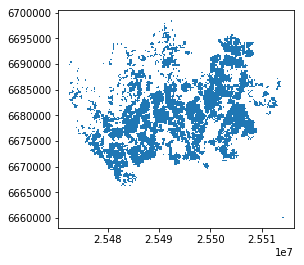

In [25]:
HelPop.plot()

In [34]:
# Are the layers in the same projection?
print(geodata1.crs)
print(HelPop.crs)

# Reproject the population data according to geodata
#HelPop = HelPop.to_crs(geodata1.crs)

#Let's re-project geodata to the projection of the population layer:
geodata1 = geodata1.to_crs(HelPop.crs)

# Also lets project train station into the same projection like population data
TrainStation = TrainStation.to_crs(HelPop.crs)

# Lets check if the projection are same or not?
print(geodata1.crs == HelPop.crs)
print(TrainStation.crs == HelPop.crs)

{'no_defs': True, 'init': 'epsg:3879'}
{'units': 'm', 'x_0': 25500000, 'lat_0': 0, 'no_defs': True, 'lon_0': 25, 'k': 1, 'y_0': 0, 'ellps': 'GRS80', 'proj': 'tmerc'}


True

In [17]:
# Make a spatial join
HelPop1 = gpd.sjoin(HelPop, geodata1, how="inner", op="within")

# Let's check the result
HelPop1.head(3)

NameError: name 'geodata1' is not defined

In [44]:
geodata1['Pop'] = HelPop1.groupby(['id'])['ASUKKAITA'].sum()
#print("Population living within 5km from {}")

#print("Max area: %s\nMean area: %s" % (round(max_area, 2), round(mean_area, 2)))

#print ("Population living within 5km from %s is %s respectively." % ( ("Itis", "Forum", "Iso-omena", "Sello", "Jumbo", "REDI"), (175632,230376, 109081,174200, 93621, 249187)))

In [46]:
HelPop1.groupby(['id'])['ASUKKAITA'].sum()

id
1     173472
2     222138
3     183483
4     173825
5     183865
6     181594
7     166302
8     165931
9     188236
10    179283
11    182024
12    162620
13    210925
14    195462
15    175912
16    219696
17    165432
18    154635
19    124213
20    170894
21    152327
22    195036
23    141973
24    134949
25    162175
26    204099
27    146760
28    124909
29    139783
30    119669
31    126566
32    207598
33    210817
34     56039
35     96943
36     94420
37    110178
38    123585
39    182773
40     79852
41    124213
42    134276
43     99929
44     90743
45    101916
46     95098
47     55694
48     66619
49     53201
50     99168
51     56944
52     53898
53     76284
Name: ASUKKAITA, dtype: int64

In [38]:
 aaa= HelPop1.groupby(['id'])['ASUKKAITA',"ASVALJYYS" ].sum()

In [43]:
type(aaa)
aaa.head()

,ASUKKAITA,ASVALJYYS
id,,
1,173472,10649.0
2,222138,15718.0
3,183483,10572.0
4,173825,10121.0
5,183865,10946.0


In [40]:
aa=HelPop1.groupby(['id'])['ASUKKAITA'].sum()
type(aa)

pandas.core.series.Series

In [42]:
#geodata1['Pop'] = aa

geodata2 = pd.merge(geodata1, aaa, on=['id'])
geodata2.head()

,address,geometry,id,name,addr,Latitude,Longitude,Pop,ASUKKAITA,ASVALJYYS
0,"Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...","POLYGON ((25501036.69414505 6673102.401364023,...",1,Ravintola Base Camp,"Yliopistonkatu 5, 00100 Helsinki",60.169910,24.946664,NaN,173472,10649.0
1,"Mountain (Nepalese kitchen), 8, Nordenskiöldin...","POLYGON ((25499390.34940629 6674932.082260647,...",2,Ravintola Mountain,"Nordenskiöldinkatu 8, 00250 Helsinki",60.186316,24.916966,89239.0,222138,15718.0
2,"Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...","POLYGON ((25500262.280232 6672820.670933601, 2...",3,Ravintola Satkar Kamppi,"Fredrikinkatu 46, 00100 Helsinki",60.167375,24.932719,61261.0,183483,10572.0
3,"Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...","POLYGON ((25500300.07711662 6672523.59975611, ...",4,Ravintola Kantipur,"Lönnrotinkatu 25, 00180 Helsinki",60.164709,24.933405,80701.0,173825,10121.0
4,"15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...","POLYGON ((25500002.18395997 6672774.585239847,...",5,Mount Everest Kamppi,"Lapinlahdenkatu 15, 00180 Helsinki",60.166958,24.928035,76357.0,183865,10946.0


In [27]:
HelPop1.groupby(['id'])['ASUKKAITA'].sum()

id
1     89239
2     61261
3     80701
4     76357
5     75782
6     41792
7     68457
8     66651
9     86990
10    93453
11    73479
12    63003
13    73956
14    87066
15    77398
16    69438
17    48840
18    62931
19    36673
20    72463
21    30356
22    70953
23    40843
24    39273
25    41722
26    59265
27    55118
28    36479
29    30181
30    37278
31    34669
32    56326
33    80637
34    29392
35    30089
36    25699
37    24240
38    38090
39    84356
40    29430
41    36673
42    36864
43    36060
44    32361
45    31727
46    33152
47    17475
48    21499
49    21417
50    33011
51    18929
52    22701
53    39052
Name: ASUKKAITA, dtype: int64

In [28]:
aa

id
1     89239
2     61261
3     80701
4     76357
5     75782
6     41792
7     68457
8     66651
9     86990
10    93453
11    73479
12    63003
13    73956
14    87066
15    77398
16    69438
17    48840
18    62931
19    36673
20    72463
21    30356
22    70953
23    40843
24    39273
25    41722
26    59265
27    55118
28    36479
29    30181
30    37278
31    34669
32    56326
33    80637
34    29392
35    30089
36    25699
37    24240
38    38090
39    84356
40    29430
41    36673
42    36864
43    36060
44    32361
45    31727
46    33152
47    17475
48    21499
49    21417
50    33011
51    18929
52    22701
53    39052
Name: ASUKKAITA, dtype: int64

In [25]:
geodata1.head()

,address,geometry,id,name,addr,Latitude,Longitude,Pop
0,"Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...","POLYGON ((25499039.10323264 6673004.266015369,...",1,Ravintola Base Camp,"Yliopistonkatu 5, 00100 Helsinki",60.169910,24.946664,NaN
1,"Mountain (Nepalese kitchen), 8, Nordenskiöldin...","POLYGON ((25497392.75849388 6674833.946911993,...",2,Ravintola Mountain,"Nordenskiöldinkatu 8, 00250 Helsinki",60.186316,24.916966,89239.0
2,"Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...","POLYGON ((25498264.68931959 6672722.535584947,...",3,Ravintola Satkar Kamppi,"Fredrikinkatu 46, 00100 Helsinki",60.167375,24.932719,61261.0
3,"Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...","POLYGON ((25498302.48620421 6672425.464407455,...",4,Ravintola Kantipur,"Lönnrotinkatu 25, 00180 Helsinki",60.164709,24.933405,80701.0
4,"15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...","POLYGON ((25498004.59304756 6672676.449891193,...",5,Mount Everest Kamppi,"Lapinlahdenkatu 15, 00180 Helsinki",60.166958,24.928035,76357.0


In [ ]:
import pandas as pd
kanton_overview = r'Switzerland_overview.csv'
kanton_data = pd.read_csv(kanton_overview)
kanton_data


kanton_map2 = folium.Map(location=[46.8, 8.33], 
                    zoom_start=7.5)
kanton_map2.choropleth(geo_path='switzerland.geojson', data=kanton_data,
             columns=['CantonNumber', 'Density'],
             key_on='feature.properties.KANTONSNUM',
             threshold_scale=[100, 200, 300, 500, 1000, 5000],
             fill_color='BuPu')
kanton_map2

In [ ]:
#add markers
for each in points:
    folium.Marker(each).add_to(my_map)
 
#add lines
folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map)

In [ ]:
import matplotlib.pyplot as plt

# Plot the points with population info
join.plot(column='pop17', cmap="Reds", markersize=7, scheme='quantiles', legend=True);

# Add title
plt.title("Amount of inhabitants living close the the point");

# Remove white space around the figure
plt.tight_layout()

In [29]:
#geodata1.to_file(filename='NepaliResturant2kmBuffer.geojson', driver='GeoJSON')
#geodata1.to_file(filename='geodata1.shp', driver="ESRI Shapefile")

In [41]:
#import folium
#m = folium.Map([60.2, 24.9], zoom_start=11, tiles='cartodbpositron')
#folium.GeoJson(geodata1).add_to(m)
#folium.LatLngPopup().add_to(m)
#m

In [35]:
#import geopandas as gpd
#from shapely.geometry import Polygon
#
#lat_point_list = [60.169910, 60.186316, 60.167375, 60.164709]
#lon_point_list = [24.946664,  24.916966, 24.932719, 24.933405]

#polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
#crs = {'init': 'epsg:4326'}
#polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       
#print(polygon.geometry)

#polygon.to_file(filename='polygon.geojson', driver='GeoJSON')
#polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")

In [15]:
#metro = r"Data/metro.shp"
#roads = r"Data/roads.shp"

# Read files
#roads = gpd.read_file(roads)
#metro = gpd.read_file(metro)

#roads.to_file(filename='roads.geojson', driver='GeoJSON')
#polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")

In [23]:
#print(metro.head(2))
#print(geodata.head(2))
#print(roads.head(2))